In [1]:
import os
import pandas as pd 
import numpy as np

1. DETERMINE THE FOLLOWING PROBLEMS :-
# THE NUMBER OF DATA POINTS (ROWS).
# THE COLUMN NAMES.
# THE DATA TYPE FOR EACH COLUMN.  


In [2]:
filepath = "iris_data.csv"
data = pd.read_csv(filepath)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
#COLUMN NAMES
data.columns.tolist()



['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [4]:
#NUMBER OF ROWS
data.shape[0]

150

In [5]:
#DATA TYPE
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

2. EXAMINE THE SPECIES NAME AND NOTE THAT THEY ALL BEGIN WITH IRIS. REMOVE THIS PORTION OF THE THE NAME SO THE SPECIES NAME IN SHORT.


# THIS METHOD WAS (APPLY METHOD)

In [6]:
data ['species'].apply (lambda x: x[5:])

0         a
1         a
2         a
3         a
4         a
       ... 
145    nica
146    nica
147    nica
148    nica
149    nica
Name: species, Length: 150, dtype: object

# THIS METHOD WAS (STRING PROCESSING METHOD)


In [7]:
data ['species'].str.replace('iris','')

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

3. DETERMINE THE FOLLOWING :-
# THE NUMBER OF EACH SPECIES. 
# THE MEAN AND MEDIAN AND QUANTIES AND RANGE(MIN-MAX).


In [8]:
# ONE WAY TO COUNT SPECIES
data.species.value_counts()


setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [9]:
# SELECT JUST THE ROWS DESIRED FROM 'DESCRIBE' METHOD AND ADD IS THE 'MEDIAN'
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
# FINDING THE RANGE + FINDING THE LIMITED COLUMNS
stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']
out_fields = ['mean','25%','50%','75%', 'range']
stats_df.loc[out_fields]


,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
50%,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


4. CALCULATE THE FOLLOWING FOR EACH SPEICES IN A SEPARATE DATAFRAME:-
# THE MEAN FOR EACH MEASUREMENT.
# MEDIAN FOR EACH MEASUREMENT.

In [11]:
data.groupby('species').mean()


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [12]:
data.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


# APPLYING MULTIPLE FUNCTION AT ONCE (2 METHOD)

In [13]:
data.groupby('species').agg(['mean','median'])#pasiing a list of recognized strings
data.groupby('species').agg([np.mean, np.median])#passing a list of sxplicit aggreation 

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

In [14]:
# IF CERTAIN FIELDS NEED TO BE AGGREGATE DIFFERENTLY

from pprint import pprint

agg_dict = {field: ['mean','median'] for field in data.columns if field != 'species' } # A DICTIONARY WHERE THE KEY IS THAT FIELD NAME, AND THE VALUE ARE THE LIST , MEAN , MEDIAN.
agg_dict['petal_length'] ='max'
pprint(agg_dict)
data.groupby('species').agg(agg_dict)

{'petal_length': 'max',
 'petal_width': ['mean', 'median'],
 'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median']}


sepal_length        sepal_width        petal_length petal_width  \
                   mean median        mean median          max        mean   
species                                                                      
setosa            5.006    5.0       3.418    3.4          1.9       0.244   
versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                   
           median  
species            
setosa        0.2  
versicolor    1.3  
virginica     2.0

5. MAKE A SCATTER PLOT OF SEPAL_LENGTH VS SEPAL_WIDTH USING MATPLOTLIB. LABEL THE AXES AND GIVE THE PLOT A TITLE.

([Text(0.5, 0, 'sepal length(m)'),
  Text(0, 0.5, 'sepal width (m)'),
  Text(0.5, 1.0, 'sepal length vs width')],)

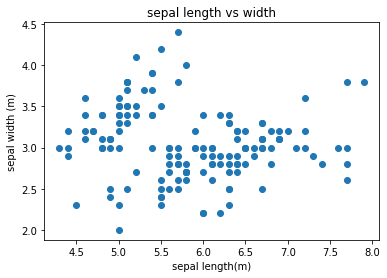

In [15]:
import matplotlib.pyplot as plt 
%matplotlib inline

#A SIMPLE SCATTER PLOT WITH MATPLOTLIB 
ax = plt.axes()  #DataFrame is a two-dimensional data structure akin to SQL table or Excel spreadsheet.It has columns and rows. Its columns are made of separate Series objects.
ax.scatter(data.sepal_length,data.sepal_width)

#LABEL THE SAME 
ax.set(xlabel = 'sepal length(m)',
ylabel = 'sepal width (m)',
title = 'sepal length vs width'),


6. MAKE A HISTOGRAM OF ANY ONE OF THE FOUR FEATURES. LABEL AXES AND TITLE IT AN APPROPRIATE.

[Text(0.5, 0, 'petal length(cm)'),
 Text(0, 0.5, 'frenquency'),
 Text(0.5, 1.0, 'distribution')]

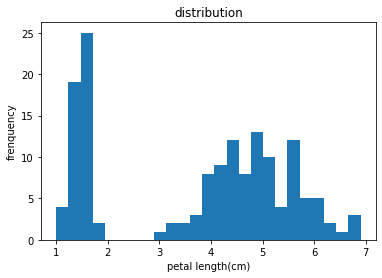

In [16]:
# USING MATPLOTLIB'S PLOTTING FUNCTIONALITY 
ax = plt.axes()
ax.hist(data.petal_length, bins=25)

ax.set(xlabel = 'petal length(cm)',
ylabel = 'frenquency',
title ='distribution')


[Text(0.5, 0, 'peatl length(cm)'),
 Text(0, 0.5, 'frequency'),
 Text(0.5, 1.0, 'distribution of petal length')]

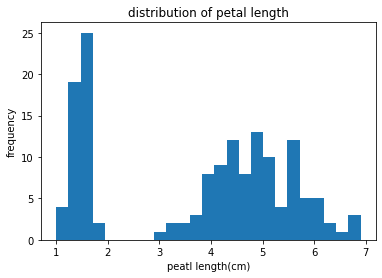

In [17]:
# ALTERNATIVELY USING PANDAS PLOTTING FUNCTIONALITY 

ax = plt.axes()
ax.hist(data.petal_length,bins=25)
ax.set(xlabel='peatl length(cm)',
ylabel = 'frequency',
title = 'distribution of petal length')


7. NOW CREATE A SINGLE PLOT WITH HISTOGRAM FOR EACH FEATURE OVERLAYED. IF YOU HAVE TIME , NEXT TRY CREATE FOUR INDIVIDUAL HISTROGRAM PLOT IN A SINGLE FIGURE , WHERE EACH PLOT CONTAINS ONE FEATURE.

Text(0.5, 0, 'size (cm)')

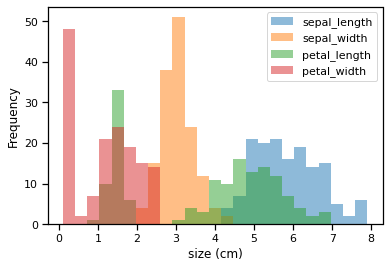

In [18]:
import seaborn as sns 
sns.set_context('notebook')
# THIS USES THE (PLOT.HIST) METHOD
ax = data.plot.hist(bins=25, alpha =0.5)# ALPHA MEANS TO LOOK THE GRAPH MORE TRANSPARENT 
ax.set_xlabel('size (cm)') 


array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

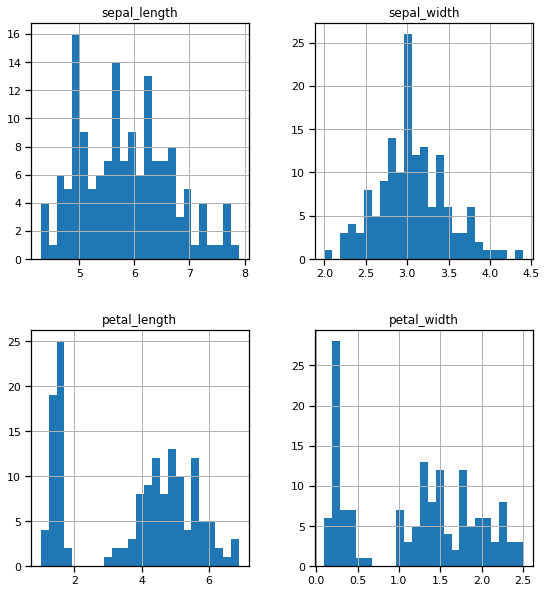

In [19]:
# TO CREATE FOUR SEPARATE PLOTS , USE PANDAS .'HIST' METHOD 
data.hist(bins=25,figsize = (9,10))


C:\Users\arjun\AppData\Local\Temp\ipykernel_15812\971485819.py:4: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():
C:\Users\arjun\AppData\Local\Temp\ipykernel_15812\971485819.py:7: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


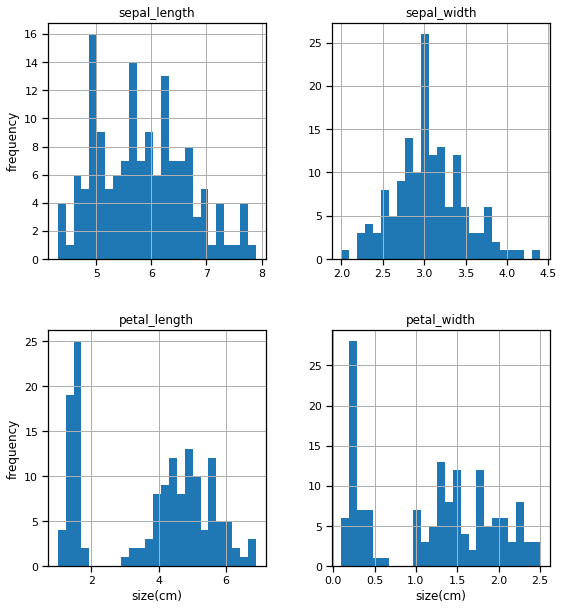

In [20]:
# ADD SOME X AND Y LABLE TO FIRST COLUMNS AND LAST ROW 
axList = data.hist(bins=25,figsize=(9,10))
for ax in axList.flatten():
    if ax.is_last_row():
        ax.set_xlabel('size(cm)')
        
    if ax.is_first_col():
        ax.set_ylabel('frequency')


8. USING PANDAS , MAKE A BOXPLOT OF EACH PETAL AND SEPAL MEASUREMENT. 

array([[<AxesSubplot:title={'center':'petal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'petal_width'}, xlabel='[species]'>],
       [<AxesSubplot:title={'center':'sepal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

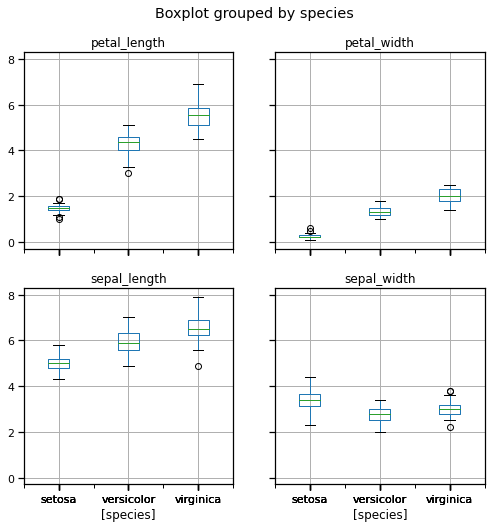

In [21]:
# HERE WE HAVE FOUR SEPARATE PLOTS 
data.boxplot(by='species',figsize=(8,8))


9. NOW MAKE A SINGKE BOXPLOT WHERE THE FEATURES ARE SEPARATED IN THE X-AXIS AND SPECIES ARE COLORED WITH DIFFERENT HUES 

(ALSO NOTE THAT SEABORN IS VERY PICKY ABOUT DATA FORMAT - FOR THIS PLOT TO WORK , THE INPUT DATA FRAME WILL NEED TO BE MANIPULATED SO THAT EACH ROW CONTAINS A SINGLE DATA POINT)

In [22]:
# FIRST WE HAVE TO RESHAPE THE DATA SO THERE IS 
# ONLY A SINGLE MEASUREMENT IN EACH COLUMN

plot_data = (data
.set_index('species')
.stack()
.to_frame()
.reset_index()
.rename(columns={0:'size','level_1':'measurement'})
)

plot_data.head()


,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


<AxesSubplot:xlabel='measurement', ylabel='size'>

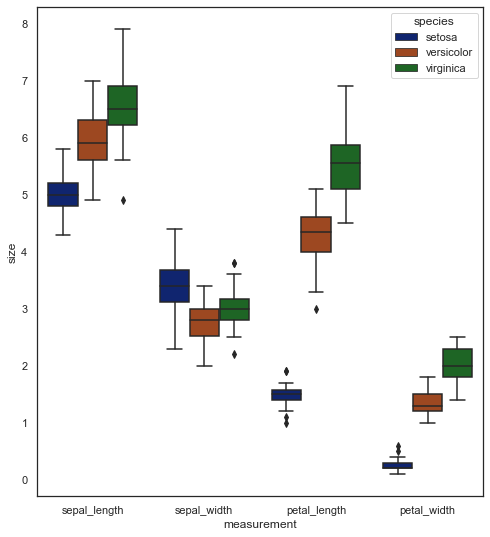

In [23]:
# NOW PLOT THE DATAFRAM FROM ABOVE USING SEABORN

sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize = (8,9))
sns.boxplot(x='measurement' , y= 'size',
hue='species',data = plot_data)


10. MAKE A PARIPLOT WITH SEASBORN TO EXAMINE THE CORRELATION BETWEEN EACH OF THE MEASUREMENTS.

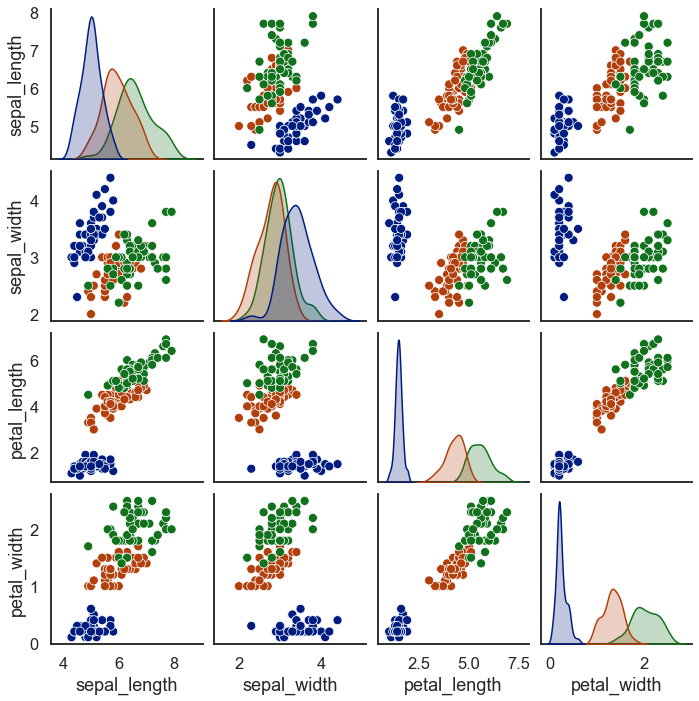

In [24]:
sns.set_context('talk')
plot = sns.pairplot(data, hue= 'species')
plot._legend.remove()
plot
